# Raster Data

#### Raster data is a type of geospatial data that represents the Earth's surface as a grid of cells or pixels. Each pixel in a raster contains a value representing a specific attribute or measurement at that location. Raster data is commonly used to represent continuous phenomena such as elevation, temperature, precipitation, land cover, satellite imagery, and more.

#### Here are some key characteristics and properties of raster data:

#### 1. Grid Structure: Raster data is organized in a grid structure with rows and columns of cells. Each cell represents a specific location on the Earth's surface and contains a value.

#### 2. Spatial Resolution: Raster data has a spatial resolution, which refers to the size of each cell in real-world units. Higher spatial resolution means smaller cell size and more detailed representation of the Earth's surface.

#### 3. Attribute Values: Each cell in a raster has an attribute value that represents a specific phenomenon or measurement. Examples of attribute values include elevation in meters, temperature in degrees Celsius, or land cover classes.

#### 4. Projection and Coordinate System: Raster data is typically associated with a coordinate reference system (CRS) that defines its spatial reference. The CRS specifies the geographic coordinates and map projection used to locate the raster data in space.

#### 5. Bands and Multiband Rasters: Raster data can have multiple bands, where each band represents a different attribute or measurement. For example, satellite imagery often consists of multiple bands capturing different parts of the electromagnetic spectrum (e.g., red, green, blue, infrared).

#### 6. Metadata: Raster data is accompanied by metadata that provides information about the dataset, such as its resolution, CRS, data type, nodata value, and other descriptive attributes.

#### 7. Manipulation and Analysis: Raster data can be manipulated and analyzed using various geospatial techniques. This includes tasks such as resampling, reprojecting, cropping, masking, filtering, and performing spatial analysis operations like terrain analysis, interpolation, and classification.

#### Raster data plays a crucial role in many fields, including remote sensing, GIS (Geographic Information Systems), environmental modeling, natural resource management, agriculture, urban planning, and more. It provides valuable information for understanding and analyzing spatial patterns, making informed decisions, and deriving meaningful insights about the Earth's surface.

# Import Libraries

In [1]:
# import libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
# load data with rasterio
with rasterio.open('E:/Python/Geospatial python/data/B08.tif') as src:
    nir = src.read(1)

# Plot the Raster file

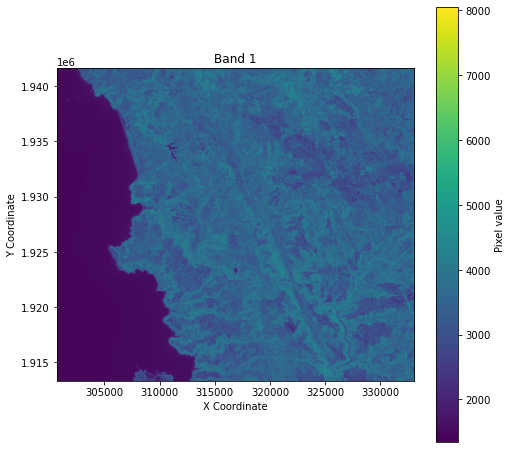

In [3]:
# Get the spatial extent of the raster
left, bottom, right, top = src.bounds

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(nir, extent=[left, right, bottom, top])
plt.title('Band 1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Pixel value')
plt.show()

# Get to know your raster file

In [4]:
# get bounds of raster
src.bounds

BoundingBox(left=300710.0, bottom=1913350.0, right=333050.0, top=1941630.0)

In [5]:
# Get the number of bands
src.count

1

In [6]:
# Get the raster size (width and height)
print('width is', src.width)
print('height is', src.height)

width is 3234
height is 2828


In [7]:
# Get the coordinate reference system (CRS)
src.crs

CRS.from_epsg(32643)

In [8]:
# Get the geotransform information (affine transformation parameters)
src.transform

Affine(10.0, 0.0, 300710.0,
       0.0, -10.0, 1941630.0)

In [9]:
# Get the data type of the raster values
src.dtypes[0]

'uint16'

In [10]:
# Get the nodata value
print(src.nodata)

None


In [11]:
# Access additional metadata tags
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3234,
 'height': 2828,
 'count': 1,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 300710.0,
        0.0, -10.0, 1941630.0)}

# Read RGB Composite

# True Colour Composite

In [12]:
# Open the raster file
with rasterio.open('E:/Python/Geospatial python/data/Band_composite.tif') as src:
    # Read the red, green, and blue bands
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)
    nir = src.read(4)

In [13]:
# Get the number of bands
src.count

4

In [14]:
# Get the data type of the raster values
src.dtypes[0]

'uint16'

In [15]:
# Access additional metadata tags
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3234,
 'height': 2828,
 'count': 4,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 300710.0,
        0.0, -10.0, 1941630.0)}

In [16]:
def preprocess_band(band, alpha=0.09, beta=0.15):
    # Brighten the band
    brightened_band = np.clip(alpha * band + beta, 0, 255)
    
    # Normalize the brightened band
    normalized_band = (brightened_band - np.min(brightened_band)) / (np.max(brightened_band) - np.min(brightened_band))
    
    return normalized_band

# Normalize each band
red_n = preprocess_band(red)
green_n = preprocess_band(green)
blue_n = preprocess_band(blue)
nir_n = preprocess_band(nir)

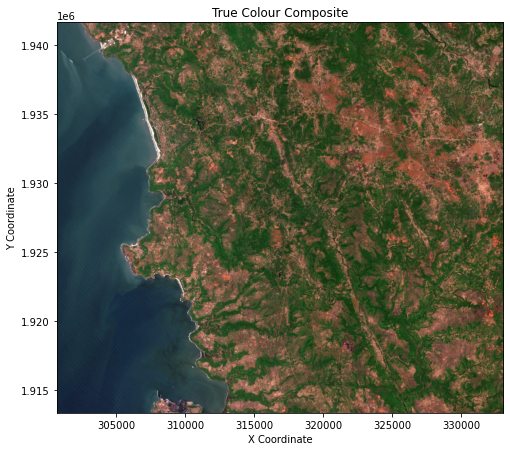

In [17]:
# stack all bands together
rgb_composite= np.dstack((red_n, green_n, blue_n))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite, extent=[left, right, bottom, top])
plt.title('True Colour Composite')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# False Colour Composite

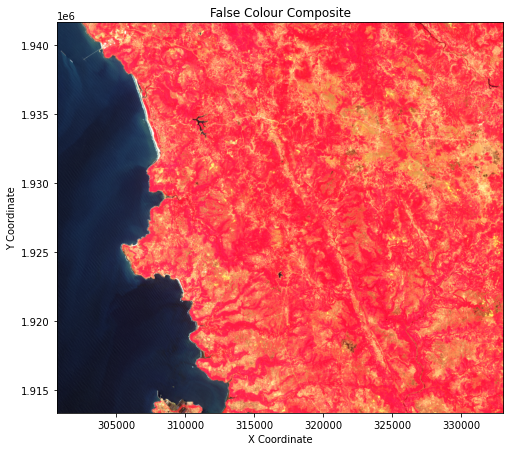

In [18]:
# stack all bands together
rgb_composite= np.dstack(( nir_n, red_n, green_n))

# plot the image
plt.figure(figsize = (8,8))
plt.imshow(rgb_composite, extent=[left, right, bottom, top])
plt.title('False Colour Composite')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()